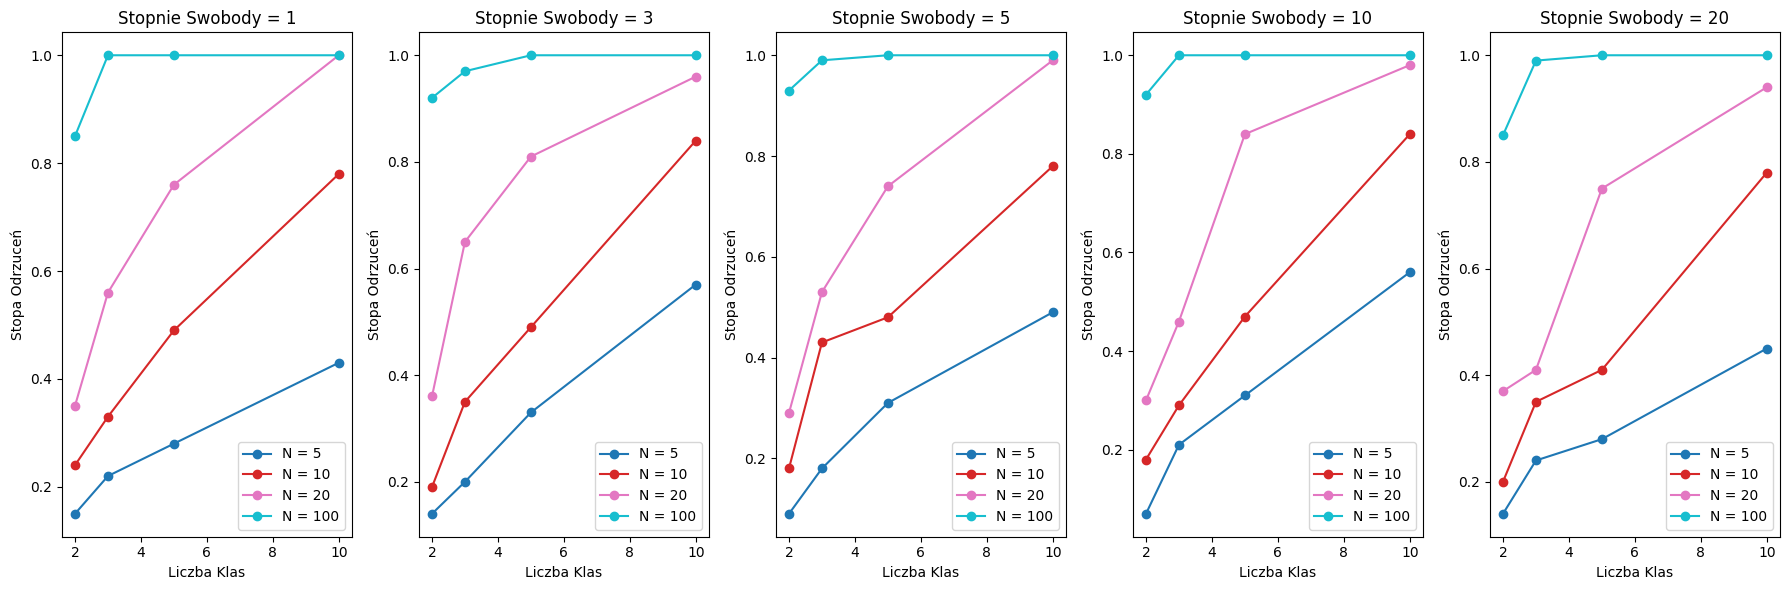

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

def symuluj_testy_chi2(liczba_probek, liczba_klas, stopnie_swobody):
    stopy_odrzucenia = np.zeros((len(liczba_probek), len(liczba_klas), len(stopnie_swobody)))

    for i, n_probek in enumerate(liczba_probek):
        for j, n_klas in enumerate(liczba_klas):
            for k, df in enumerate(stopnie_swobody):
                p_wartosci = []
                for _ in range(num_symulacji):
                    obserwowane = np.random.randint(1, 10, size=(n_probek, n_klas))
                    _, p, _, _ = chi2_contingency(obserwowane)
                    p_wartosci.append(p)
                stopy_odrzucenia[i, j, k] = np.mean(np.array(p_wartosci) < 0.05)

    return stopy_odrzucenia

# Parametry
liczba_probek = [5, 10, 20, 100]
liczba_klas = [2, 3, 5, 10]
stopnie_swobody = [1, 3, 5, 10, 20]  

num_symulacji = 100

stopy_odrzucenia = symuluj_testy_chi2(liczba_probek, liczba_klas, stopnie_swobody)

# Tworzenie wykresów
plt.figure(figsize=(18, 6))

colors = plt.cm.tab10(np.linspace(0, 1, len(liczba_probek)))

for i, df in enumerate(stopnie_swobody):
    plt.subplot(1, len(stopnie_swobody), i+1)
    plt.title(f'Stopnie Swobody = {df}')
    plt.xlabel('Liczba Klas')
    plt.ylabel('Stopa Odrzuceń')
    for j, n_probek in enumerate(liczba_probek):
        plt.plot(liczba_klas, stopy_odrzucenia[j, :, i], label=f'N = {n_probek}', color=colors[j], marker='o')
    plt.legend()

plt.tight_layout()
plt.show()


Kod, który przedstawiłeś, przeprowadza symulacje testu chi-kwadrat dla różnych kombinacji liczby próbek, liczby klas i stopni swobody. 

Dla każdej kombinacji tych parametrów, generowane są losowe obserwacje, które następnie są poddawane testowi chi-kwadrat za pomocą funkcji `chi2_contingency` z biblioteki `scipy.stats`. Test ten jest używany do sprawdzenia, czy istnieje zależność między kategoriami w tabeli kontyngencji.

Wynikiem każdej symulacji jest stopa odrzuceń hipotezy zerowej (że dane są niezależne) dla danego zestawu parametrów. Wyniki są prezentowane na wykresach, gdzie na osi X mamy liczbę klas, a na osi Y - stopę odrzuceń.

Z wyników można wyciągnąć wniosek, że stopa odrzuceń hipotezy zerowej zależy od liczby próbek, liczby klas i stopni swobody. W zależności od tych parametrów, test chi-kwadrat może mieć różną moc w wykrywaniu zależności między kategoriami. To pokazuje, jak ważne jest dostosowanie testów statystycznych do specyfiki analizowanych danych.